In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.preprocessing import RobustScaler


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.shape

(303, 14)

***Conclusion:in our dataset there are 303 rows and 14 columns***

In [4]:
# getting  information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


***conclusion:there is no missing value in out dataset***

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
df.isnull().sum().sum()

0

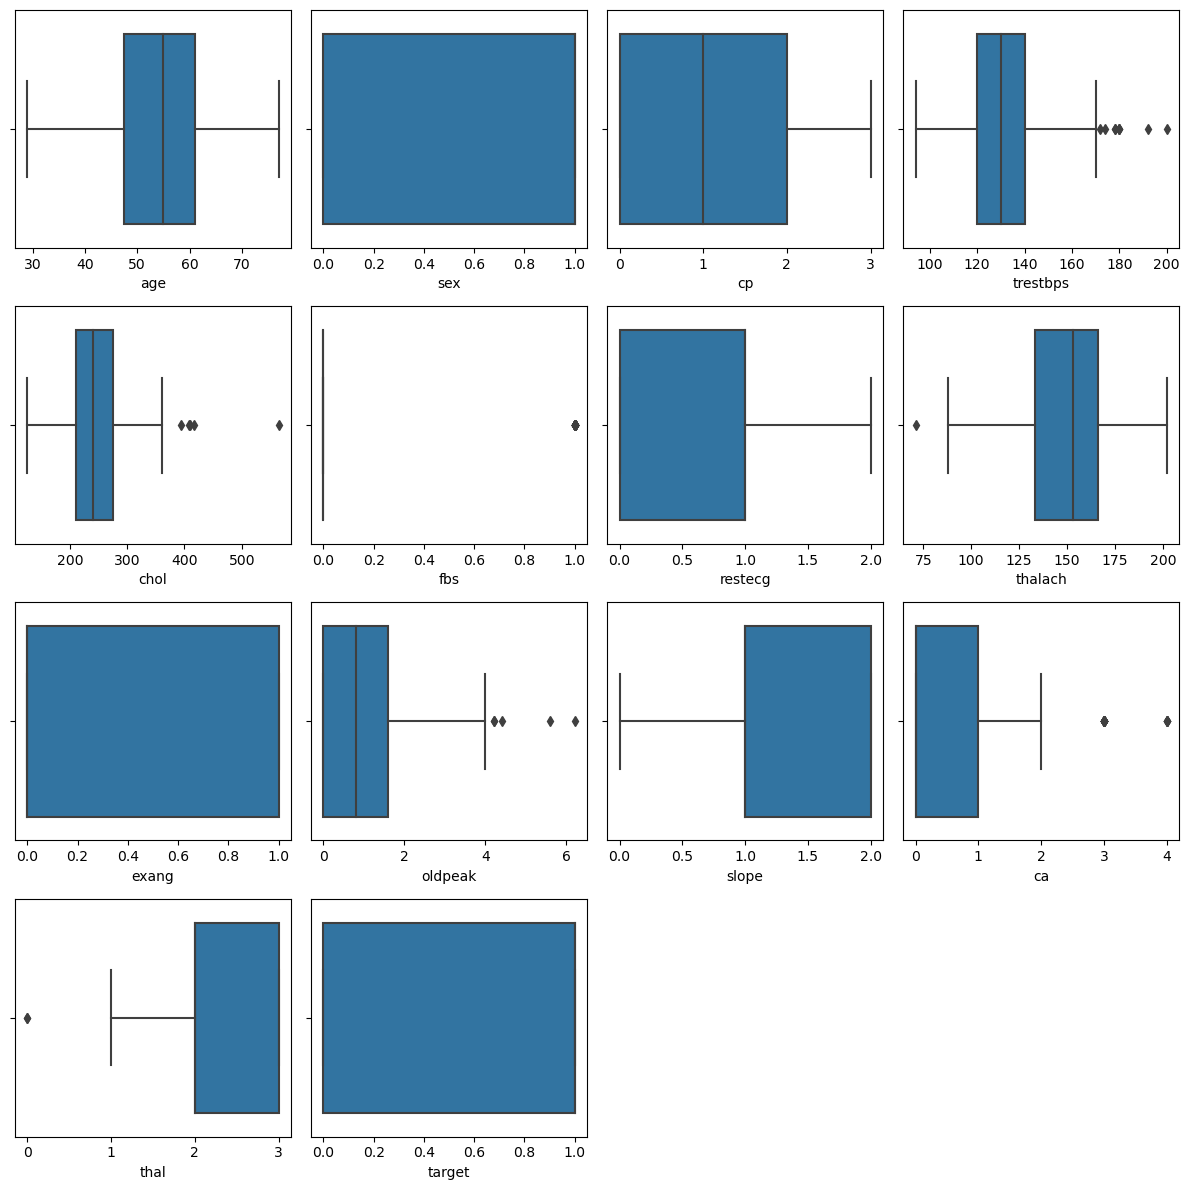

In [7]:
#ploting distrinution of all independent numerical variable

plt.figure(figsize=(12,12))
plotnumber = 1
for column in df.columns:
    ax = plt.subplot(4,4,plotnumber)
    sns.boxplot(df[column])
    plt.tight_layout()
    plotnumber+=1

***conclusion: As per the above plot most of the numerical features are approximiately normally distributed and less number of outlier present in our dataset.***

In [8]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

zero class count: 138, one class count: 165


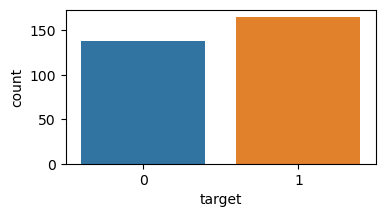

In [9]:
# visualizing the target column
print("zero class count: " +str(df['target'].value_counts()[0]) + ", one class count: " + str(df['target'].value_counts()[1]))
plt.figure(figsize=(4,2))
sns.countplot(data=df,x='target');

***Decision:the target classes are balanced so no need to resample***

In [10]:
X=df.drop('target',axis=1)
y = df['target']

# Creating Functions for model training and evaluation

In [11]:
 def model_performance(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = round(accuracy_score(true, predicted),2) 
    f1 = round(f1_score(true, predicted),2)
    precision = round(precision_score(true, predicted),2)
    recall = round(recall_score(true, predicted),2) 
    roc_auc = round(roc_auc_score(true, predicted),2)
    return acc, f1 , precision, recall, roc_auc

In [12]:
def model_building(X,y,models):
    '''
    This function takes in X and y and models  as input.
    It splits the data into Train Test split.
    evaluates the performance metrics on train and test dataset.
    Returns: Dataframe which contains report of the models metrics.
    '''
    
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    for i in range(len(list(models))):
        key = list(models.keys())[i]
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        #
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # model prediction 
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)


        # model Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=model_performance(y_train ,y_train_pred)

        # model Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=model_performance(y_test, y_test_pred)
    
        
        row_data = [model_train_accuracy,model_test_accuracy,model_train_f1,model_test_f1,model_train_precision,
                        model_test_precision,model_train_recall,model_test_recall,model_train_rocauc_score,
                        model_test_rocauc_score]


        print(f'{key} Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1))
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        print('----------------------------------')
        print(f'{key} Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print('='*35)
        print('\n')
        
    global performance_df
    performance_df = performance_df.append(pd.Series(row_data, index=performance_df.columns, name=key))

In [13]:
performance_df = pd.DataFrame(columns=['Train Accuracy','Test Accuracy','Train F1','Test F1','Train Precision',
                                       'Test Precision','Train Recall','Test Recall','Train auc','Test auc'])

In [14]:
logistic_models = {'Logistic Regression':LogisticRegression()}
model_building(X=X,y=y,models=logistic_models)

Logistic Regression Model performance for Training set
- Accuracy: 0.8500
- F1 score: 0.8700
- Precision: 0.8300
- Recall: 0.9100
- Roc Auc Score: 0.8400
----------------------------------
Logistic Regression Model performance for Test set
- Accuracy: 0.8900
- F1 score: 0.8900
- Precision: 0.8800
- Recall: 0.9100
- Roc Auc Score: 0.8800




In [15]:
svc_model = {'Support Vector Classifier':SVC()}
model_building(X=X,y=y,models=svc_model)

Support Vector Classifier Model performance for Training set
- Accuracy: 0.6600
- F1 score: 0.7300
- Precision: 0.6400
- Recall: 0.8600
- Roc Auc Score: 0.6300
----------------------------------
Support Vector Classifier Model performance for Test set
- Accuracy: 0.7000
- F1 score: 0.7600
- Precision: 0.6700
- Recall: 0.8800
- Roc Auc Score: 0.7000




In [16]:
knc_model = {'K-Neighbors Classifier': KNeighborsClassifier()}
model_building(X=X,y=y,models=knc_model)

K-Neighbors Classifier Model performance for Training set
- Accuracy: 0.7600
- F1 score: 0.7900
- Precision: 0.7600
- Recall: 0.8300
- Roc Auc Score: 0.7500
----------------------------------
K-Neighbors Classifier Model performance for Test set
- Accuracy: 0.6900
- F1 score: 0.7200
- Precision: 0.6900
- Recall: 0.7500
- Roc Auc Score: 0.6900




In [17]:
nbc_model = {'Naive Bayes Classifier':BernoulliNB()}
model_building(X=X,y=y,models=nbc_model)

Naive Bayes Classifier Model performance for Training set
- Accuracy: 0.8200
- F1 score: 0.8400
- Precision: 0.8200
- Recall: 0.8700
- Roc Auc Score: 0.8200
----------------------------------
Naive Bayes Classifier Model performance for Test set
- Accuracy: 0.8700
- F1 score: 0.8800
- Precision: 0.8800
- Recall: 0.8800
- Roc Auc Score: 0.8700




In [18]:
dtc_model = {'Decesion Tree':DecisionTreeClassifier()}
model_building(X=X,y=y,models=dtc_model)

Decesion Tree Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Decesion Tree Model performance for Test set
- Accuracy: 0.8500
- F1 score: 0.8500
- Precision: 0.9300
- Recall: 0.7800
- Roc Auc Score: 0.8600




In [19]:
rf_model={'Random Forest': RandomForestClassifier()} 
model_building(X=X,y=y,models=rf_model)

Random Forest Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Random Forest Model performance for Test set
- Accuracy: 0.8700
- F1 score: 0.8800
- Precision: 0.8500
- Recall: 0.9100
- Roc Auc Score: 0.8700




In [20]:
abc_model={'AdaBoost Classifier':AdaBoostClassifier()} 
model_building(X=X,y=y,models=abc_model)

AdaBoost Classifier Model performance for Training set
- Accuracy: 0.9400
- F1 score: 0.9400
- Precision: 0.9500
- Recall: 0.9400
- Roc Auc Score: 0.9400
----------------------------------
AdaBoost Classifier Model performance for Test set
- Accuracy: 0.8000
- F1 score: 0.8000
- Precision: 0.8600
- Recall: 0.7500
- Roc Auc Score: 0.8100




In [21]:
gbc_model={'GradientBoost Classifier':GradientBoostingClassifier()} 
model_building(X=X,y=y,models=gbc_model)

GradientBoost Classifier Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
GradientBoost Classifier Model performance for Test set
- Accuracy: 0.7700
- F1 score: 0.7700
- Precision: 0.8000
- Recall: 0.7500
- Roc Auc Score: 0.7700




In [22]:
xgbc_model={'Xgboost Classifier':XGBClassifier()} 
model_building(X=X,y=y,models=xgbc_model)

Xgboost Classifier Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Xgboost Classifier Model performance for Test set
- Accuracy: 0.8200
- F1 score: 0.8200
- Precision: 0.8600
- Recall: 0.7800
- Roc Auc Score: 0.8200




In [23]:
performance_df

,Train Accuracy,Test Accuracy,Train F1,Test F1,Train Precision,Test Precision,Train Recall,Test Recall,Train auc,Test auc
Logistic Regression,0.85,0.89,0.87,0.89,0.83,0.88,0.91,0.91,0.84,0.88
Support Vector Classifier,0.66,0.70,0.73,0.76,0.64,0.67,0.86,0.88,0.63,0.70
K-Neighbors Classifier,0.76,0.69,0.79,0.72,0.76,0.69,0.83,0.75,0.75,0.69
Naive Bayes Classifier,0.82,0.87,0.84,0.88,0.82,0.88,0.87,0.88,0.82,0.87
Decesion Tree,1.00,0.85,1.00,0.85,1.00,0.93,1.00,0.78,1.00,0.86
Random Forest,1.00,0.87,1.00,0.88,1.00,0.85,1.00,0.91,1.00,0.87
AdaBoost Classifier,0.94,0.80,0.94,0.80,0.95,0.86,0.94,0.75,0.94,0.81
GradientBoost Classifier,1.00,0.77,1.00,0.77,1.00,0.80,1.00,0.75,1.00,0.77
Xgboost Classifier,1.00,0.82,1.00,0.82,1.00,0.86,1.00,0.78,1.00,0.82


***conclusion:simple Logistic Regression is doing better job at classifying whether a person have heart attact or not***

In [24]:
def grid_model(model,param_grid,X,y,model_name):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    
    model = GridSearchCV(estimator=model,param_grid=param_grid,cv=5)
    model.fit(X_train,y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # model prediction 
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    # model Training set performance
    model_train_accuracy, model_train_f1,model_train_precision,\
    model_train_recall,model_train_rocauc_score=model_performance(y_train ,y_train_pred)

    # model Test set performance
    model_test_accuracy,model_test_f1,model_test_precision,\
    model_test_recall,model_test_rocauc_score=model_performance(y_test, y_test_pred)


    row_data = [model_train_accuracy,model_test_accuracy,model_train_f1,model_test_f1,model_train_precision,
                    model_test_precision,model_train_recall,model_test_recall,model_train_rocauc_score,
                    model_test_rocauc_score]
    
    print(f'Best Parameter values: {model.best_params_}\n')
    print(f'{model_name} Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
    print('----------------------------------')
    print(f'{model_name} Model performance for Training set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
    print('='*35)
    print('\n')
    global grid_performance_df
    grid_performance_df = grid_performance_df.append(pd.Series(row_data, index=grid_performance_df.columns, name=model_name))

In [25]:
grid_performance_df = pd.DataFrame(columns=['Train Accuracy','Test Accuracy','Train F1','Test F1','Train Precision',
                                       'Test Precision','Train Recall','Test Recall','Train auc','Test auc'])

In [26]:
dtc_model = DecisionTreeClassifier()
param_grid = {'criterion' : ["gini", "entropy"],
 'splitter': ["best", "random"],
 'max_depth' : range(2,10,1),
 'min_samples_split':range(2,10,1),
'min_samples_leaf':range(1,10,1),
}
grid_model(model=dtc_model,param_grid=param_grid,X=X,y=y,model_name='Decision Tree Model')


Best Parameter values: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 4, 'splitter': 'random'}

Decision Tree Model Model performance for Training set
- Accuracy: 0.9100
- F1 score: 0.9200
- Precision: 0.9200
- Recall: 0.9200
- Roc Auc Score: 0.9100
----------------------------------
Decision Tree Model Model performance for Training set
- Accuracy: 0.7700
- F1 score: 0.7700
- Precision: 0.8000
- Recall: 0.7500
- Roc Auc Score: 0.7700




In [27]:
rfc_model = RandomForestClassifier()
param_grid = {
'n_estimators':[100,150,200,250],
'max_features':['sqrt', 'log2', None],
'bootstrap':[True,False],
'oob_score':[True,False]}
grid_model(model=rfc_model,param_grid=param_grid,X=X,y=y,model_name='Random Forest Classifier')

Best Parameter values: {'bootstrap': False, 'max_features': 'sqrt', 'n_estimators': 250, 'oob_score': False}

Random Forest Classifier Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Random Forest Classifier Model performance for Training set
- Accuracy: 0.8200
- F1 score: 0.8300
- Precision: 0.8400
- Recall: 0.8100
- Roc Auc Score: 0.8200




In [28]:
abc_model = AdaBoostClassifier()
param_grid = {'n_estimators': [50, 100, 150],'learning_rate': [0.01, 0.1, 1.0,0.3]}
grid_model(model=abc_model,param_grid=param_grid,X=X,y=y,model_name='Adaboost Classifier')

Best Parameter values: {'learning_rate': 0.1, 'n_estimators': 50}

Adaboost Classifier Model performance for Training set
- Accuracy: 0.8800
- F1 score: 0.8900
- Precision: 0.8600
- Recall: 0.9200
- Roc Auc Score: 0.8700
----------------------------------
Adaboost Classifier Model performance for Training set
- Accuracy: 0.8500
- F1 score: 0.8600
- Precision: 0.8700
- Recall: 0.8400
- Roc Auc Score: 0.8500




In [29]:
gbc_model = GradientBoostingClassifier()
param_grid = {
 'n_estimators': [50, 100, 150], 
 'learning_rate': [0.01, 0.1, 0.2,0.3], 
 'subsample': [0.8, 0.9, 1.0], 
}
grid_model(model=gbc_model,param_grid=param_grid,X=X,y=y,model_name='GradientBoost Classifier')

Best Parameter values: {'learning_rate': 0.2, 'n_estimators': 50, 'subsample': 0.8}

GradientBoost Classifier Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
GradientBoost Classifier Model performance for Training set
- Accuracy: 0.8500
- F1 score: 0.8600
- Precision: 0.8700
- Recall: 0.8400
- Roc Auc Score: 0.8500




In [30]:
xgb_model = XGBClassifier()
param_grid = {
 'n_estimators': [50, 100, 150],
 'max_depth': [3, 4, 5],
 'learning_rate': [0.01, 0.1, 0.2],
 'subsample': [0.8, 0.9, 1.0],
 'colsample_bytree': [0.8, 0.9, 1.0]
}
grid_model(model=xgb_model,param_grid=param_grid,X=X,y=y,model_name='Xgboost Classifier')

Best Parameter values: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150, 'subsample': 1.0}

Xgboost Classifier Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 0.9900
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Xgboost Classifier Model performance for Training set
- Accuracy: 0.7900
- F1 score: 0.7800
- Precision: 0.8500
- Recall: 0.7200
- Roc Auc Score: 0.7900




In [31]:
grid_performance_df

,Train Accuracy,Test Accuracy,Train F1,Test F1,Train Precision,Test Precision,Train Recall,Test Recall,Train auc,Test auc
Decision Tree Model,0.91,0.77,0.92,0.77,0.92,0.80,0.92,0.75,0.91,0.77
Random Forest Classifier,1.00,0.82,1.00,0.83,1.00,0.84,1.00,0.81,1.00,0.82
Adaboost Classifier,0.88,0.85,0.89,0.86,0.86,0.87,0.92,0.84,0.87,0.85
GradientBoost Classifier,1.00,0.85,1.00,0.86,1.00,0.87,1.00,0.84,1.00,0.85
Xgboost Classifier,1.00,0.79,1.00,0.78,0.99,0.85,1.00,0.72,1.00,0.79


***conclusion:aslo after tuning the hyperparameter no significant improve on accuracy so we will go with simple logistic regression which gives highest roc_auc_score.***

Final Logistic Regression model Accuracy Score (Test) : 0.89


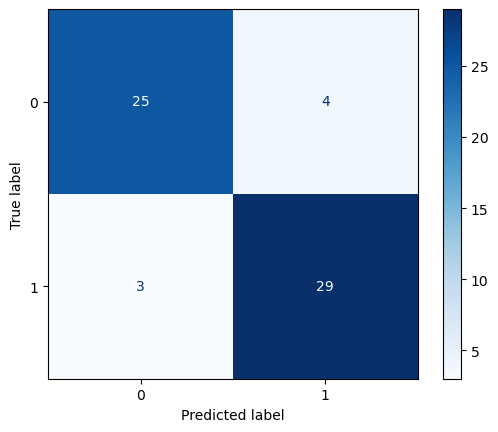

In [32]:
final_model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
final_model = final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
print("Final Logistic Regression model Accuracy Score (Test) :", round(accuracy_score(y_pred,y_test),2))
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(final_model, X_test, y_test, cmap='Blues', values_format='d');